In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [37]:
import zipfile

In [4]:
#se unzip la carpeta que contiene todas las imagenes y las anotaciones
with zipfile.ZipFile("train_xray.zip","r") as zip_ref:
    zip_ref.extractall()

In [3]:
#path corresponde al lugar donde se tiene las imagenes ya descomprimidas
path = Config.data_path()/'XRayCov19'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/storage/XRayCov19')

In [4]:
#el archivo .csv contiene las anotaciones ya organizadas de la base de datos
df = pd.read_csv(path/'train_xray_todos.csv')
df.tail(100)

,image_name,labels
5186,person906_virus_1562.jpeg,Pnemonia Virus
5187,person906_bacteria_2831.jpeg,Pnemonia bacteria
5188,person905_virus_1561.jpeg,Pnemonia Virus
5189,person905_bacteria_2830.jpeg,Pnemonia bacteria
5190,person904_bacteria_2829.jpeg,Pnemonia bacteria
5191,person903_bacteria_2828.jpeg,Pnemonia bacteria
5192,person902_bacteria_2827.jpeg,Pnemonia bacteria
5193,person901_virus_1555.jpeg,Pnemonia Virus
5194,person900_virus_1554.jpeg,Pnemonia Virus
5195,person8_bacteria_37.jpeg,Pnemonia bacteria


In [6]:
#se comprueba que el archivo de anotaciones contenga toda la informacion de las clases a clasificar
df.labels.value_counts()

Pnemonia bacteria                  2530
Pnemonia Virus                     1345
Normal                             1342
Pnemonia Virus COVID19               58
Pnemonia bacteria Streptococcus       5
Pnemonia Virus SARS                   4
Pnemonia StressSmoking ARDS           2
Name: labels, dtype: int64

In [1]:
#se definen las transformaciones especificas para el modelo
tfms = get_transforms( max_lighting=0.1, max_zoom=1, max_warp=0.)

NameError: name 'get_transforms' is not defined

In [9]:
#se crea el databuncha a utilizar
np.random.seed(45)
src = (ImageList.from_csv(path, 'train_xray_todos.csv', folder='train')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

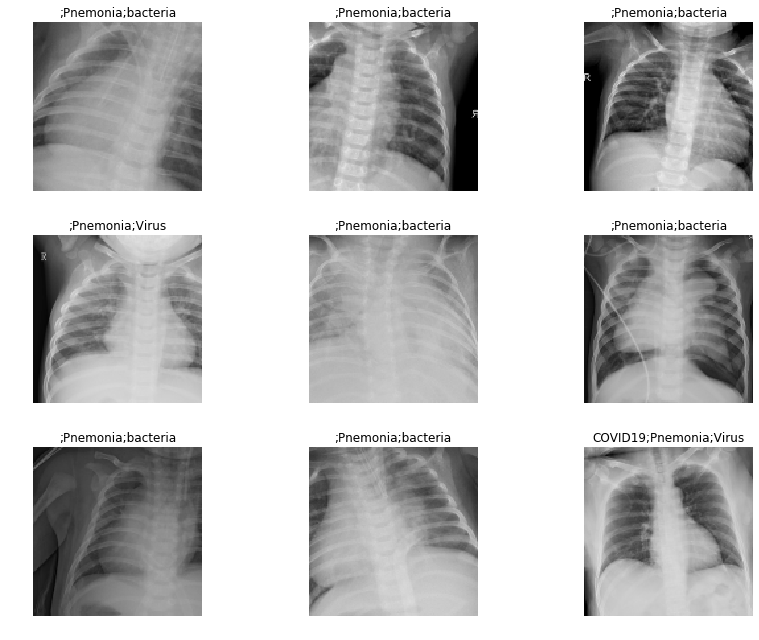

In [11]:
data.show_batch(rows=3, figsize=(12,9))

In [12]:
#se comprueba que las clases posibles y las que tiene la data sean las mismas
data.c==len(data.classes)

True

In [15]:
data.classes

['',
 'ARDS',
 'COVID19',
 'Normal',
 'Pnemonia',
 'SARS',
 'Streptococcus',
 'StressSmoking',
 'Virus',
 'bacteria']

In [16]:
#se define la arquitectura de la red
arch = models.resnet34

In [17]:
#como se tiene un modelo multiclase se define la accuraci con un thresshhold de 0.2
acc_02 = partial(accuracy_thresh, thresh=0.2)
#igualmente se hace para el fscore
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

In [20]:
#de aqui para abajo se hace el entrenamiento del modelo 
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


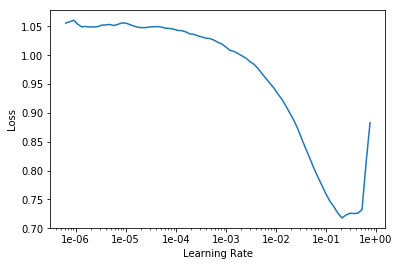

In [21]:
learn.recorder.plot()

In [22]:
data.classes

['',
 'ARDS',
 'COVID19',
 'Normal',
 'Pnemonia',
 'SARS',
 'Streptococcus',
 'StressSmoking',
 'Virus',
 'bacteria']

In [23]:
lr = 1e-01

In [24]:
learn.fit_one_cycle(5, slice(1e-02,lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.285032,0.200050,0.924314,0.905752,00:43
1,0.186620,0.137721,0.929896,0.937087,00:42
2,0.141468,0.110021,0.933113,0.941673,00:43
3,0.112377,0.095205,0.944465,0.950936,00:43
4,0.096557,0.085865,0.950993,0.955084,00:43


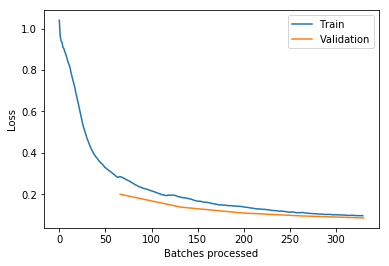

In [25]:
learn.recorder.plot_losses()

In [26]:
learn.save('cov19-stage-1-rn34')

In [27]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


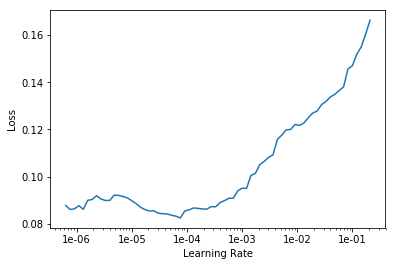

In [28]:
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.103083,0.113472,0.950047,0.941795,00:46
1,0.110083,0.106647,0.932167,0.944777,00:43
2,0.098986,0.091899,0.951750,0.949089,00:42
3,0.086593,0.079728,0.956859,0.959473,00:43
4,0.079127,0.079441,0.958278,0.959599,00:44


In [31]:
learn.save('cov19-stage-2-rn34')

In [52]:
learn.load('cov19-stage-2-rn34')

Learner(data=ImageDataBunch;

Train: LabelList (4229 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Normal;;,Normal;;,Normal;;,Normal;;,Normal;;
Path: /storage/XRayCov19;

Valid: LabelList (1057 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Pnemonia;Virus;,Pnemonia;Virus;,Normal;;,Pnemonia;Virus;,Normal;;
Path: /storage/XRayCov19;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

In [53]:
data.classes

['',
 'ARDS',
 'COVID19',
 'Normal',
 'Pnemonia',
 'SARS',
 'Streptococcus',
 'StressSmoking',
 'Virus',
 'bacteria']

In [54]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [55]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


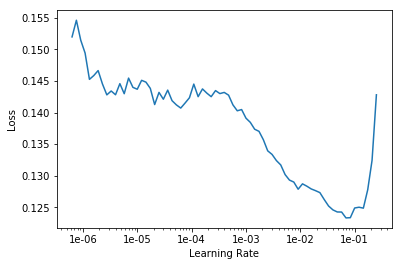

In [56]:
learn.lr_find()
learn.recorder.plot()

In [57]:
lr=1e-2/2

In [58]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.126340,0.107372,0.931126,0.941804,00:57
1,0.107230,0.098873,0.935951,0.948028,00:57
2,0.098691,0.093537,0.947398,0.949903,00:57
3,0.095194,0.091846,0.944749,0.951320,00:58
4,0.093636,0.092103,0.947398,0.952624,00:58


In [59]:
learn.save('cov19-stage-1-256-rn34')

In [62]:
learn.load('cov19-stage-1-256-rn34')

Learner(data=ImageDataBunch;

Train: LabelList (4229 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Normal;;,Normal;;,Normal;;,Normal;;,Normal;;
Path: /storage/XRayCov19;

Valid: LabelList (1057 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
Pnemonia;Virus;,Pnemonia;Virus;,Normal;;,Pnemonia;Virus;,Normal;;
Path: /storage/XRayCov19;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


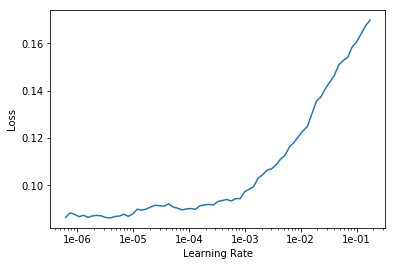

In [64]:
learn.lr_find()
learn.recorder.plot()

In [63]:
learn.unfreeze()

In [65]:
learn.fit_one_cycle(5, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.090070,0.091761,0.939830,0.949046,01:00
1,0.087251,0.093337,0.943709,0.950169,01:00
2,0.081504,0.080917,0.950993,0.959754,01:00
3,0.079103,0.078773,0.952602,0.959208,00:59
4,0.075075,0.078060,0.954872,0.961119,01:00


In [66]:
learn.save('cov19-stage-2-256-rn34')

In [69]:
learn.export()

In [71]:
data.classes

['',
 'ARDS',
 'COVID19',
 'Normal',
 'Pnemonia',
 'SARS',
 'Streptococcus',
 'StressSmoking',
 'Virus',
 'bacteria']